In [105]:
from keras.models import load_model
import os
import pickle

# import pandas as pd

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt


In [20]:
MODELS_DIR = 'models'

In [21]:
model_filenames = [x for x in os.listdir(MODELS_DIR) if x.endswith('.model')]


In [22]:
def load_checkpointed_keras_model(model_filename):
    model_filepath = os.path.join(MODELS_DIR, model_filename)
    model = load_model(model_filepath)
    return model

In [26]:
base_run_names = [model_name.split('.')[0] for model_name in model_filenames]

In [98]:
LABEL_DICT = {
    0: "color_green",
    1: "color_purple",
    2: "color_red",
    3: "fill_empty",
    4: "fill_lines",
    5: "fill_solid",
    6: "number_1",
    7: "number_2",
    8: "number_3",
    9: "shape_diamond",
    10: "shape_oval",
    11: "shape_squiggle"
    }


In [101]:
def get_fpr_tpr_roc_auc(test_y, predictions):
    fpr_dict = {}
    tpr_dict = {}
    roc_auc_dict = {}
    for label_ind in LABEL_DICT.keys():
        fpr_dict[label_ind], tpr_dict[label_ind], _ = roc_curve(y_true=test_y[:, label_ind], y_score=predictions[:, label_ind])
        roc_auc_dict[label_ind] = auc(fpr_dict[label_ind], tpr_dict[label_ind])
    return fpr_dict, tpr_dict, roc_auc_dict

In [102]:
def plot_auc_roc(fpr_dict, tpr_dict):
    fig, axes = plt.subplots(4, 1, figsize=(8,12))
    for label_ind in fpr_dict.keys():
        # group the plot by data type
        this_ax = axes[label_ind // 3]
        g = this_ax.plot(fpr_dict[label_ind], tpr_dict[label_ind], label=LABEL_DICT[label_ind])
        this_ax.legend()
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    fig.suptitle('AUC-ROC curve')


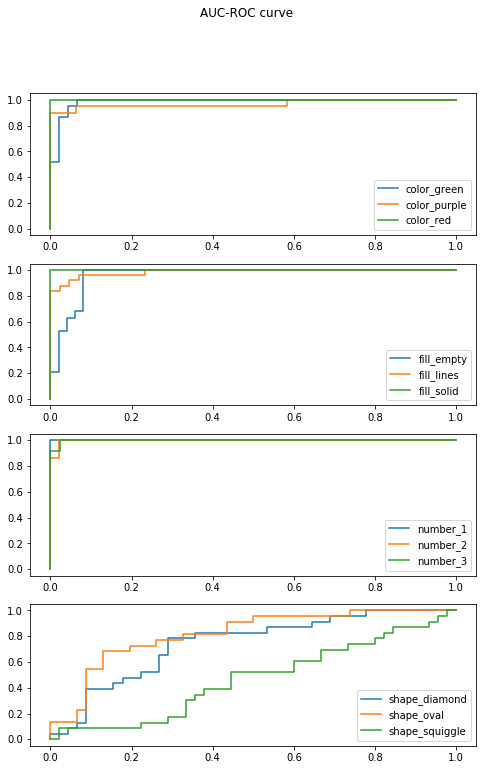

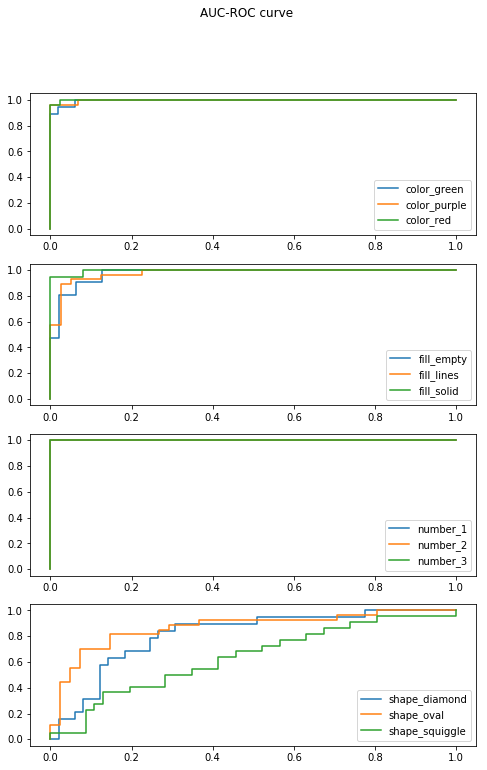

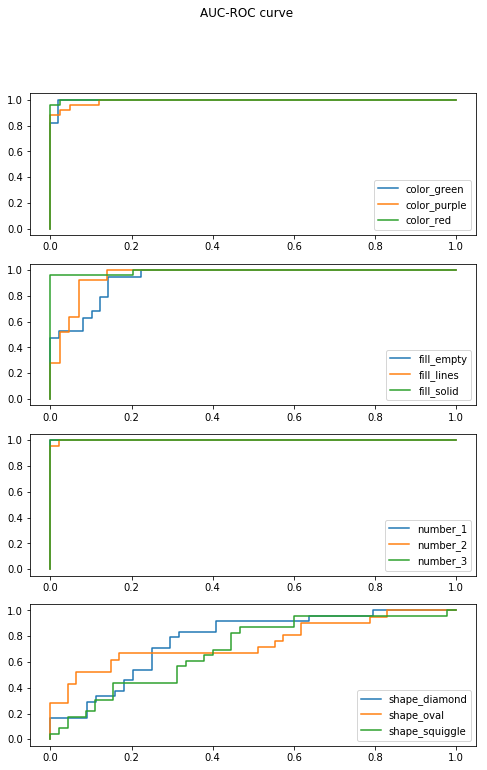

In [106]:

for model_filename in [model_filenames[0]]:
    model = load_checkpointed_keras_model(model_filename)
    for base_run_name in base_run_names:
        data_filename = base_run_name + '.data'
        with open(os.path.join(MODELS_DIR, data_filename), 'rb') as fin:
            train_x, test_x, train_y, test_y = pickle.load(fin)
            predictions = model.predict(test_x)
            fpr_dict, tpr_dict, roc_auc_dict = get_fpr_tpr_roc_auc(test_y, predictions)
            plot_auc_roc(fpr_dict, tpr_dict)